# Business impact of discount
We conduct a brief analysis on the discount strategy proposed. This is just 1 way to solve it, there may be many other ways!
The SME division head proposed that we give a 20% discount to high propensity to churn customers. We can assume to start that everyone who is offered a discount will accept it.

## 1.1 Workflow
Our task is to calculate the forecast revenue for the set of customers:
1. When no discount is offered
2. And when a discount is offered based on a probability cutoff to decide who should receive the
20% discount

And hence to decide where the cut-off should be set in order to maximise revenue


### Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
test_df = pd.read_csv('./out_of_sample_data_with_predictions.csv', index_col = [0])
test_df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
0,4.173390,4.193598,3.165541,3.168368,3.165541,0.0,2.073828,0.114667,0.099548,40.606701,...,0,0,1,0,0,0,0,1,0,0.115
1,4.075036,0.000000,3.003461,3.305998,3.003461,30.0,1.255031,0.198096,0.000000,46.305378,...,0,0,1,0,0,0,0,1,0,0.178
2,3.848435,0.000000,0.000000,2.756568,0.000000,0.0,1.289366,0.141434,0.000000,44.311378,...,0,0,1,0,0,0,0,1,0,0.025
3,4.345433,0.000000,0.000000,3.516690,0.000000,0.0,1.304921,0.142996,0.000000,44.311378,...,0,0,1,0,0,0,0,1,0,0.067
4,4.185655,0.000000,3.355834,3.208148,3.355834,0.0,2.123067,0.120372,0.103487,40.606701,...,0,0,1,0,0,0,1,0,0,0.068


### Baseline revenue estimate

- basecase_revenue: 

baseline estimate of the electricity revenue for every customer for the next twelve months based on the forecast consumption and forecast price and actual churn outcome. 

- basecase_revenue_after_churn: = basecase_revenue * (1-0.0919 churn)

Reduce 100% revenue for clients churn on 1,1,2016

Reduce 83.9% revenue for clients churn at the end of Feburary (59/365 days)

Overall 91.9% loss


In [4]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = (np.power(10, test_df['forecast_cons_12m']) + 1) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']

# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn'])

In [5]:
test_df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
0,4.173390,4.193598,3.165541,3.168368,3.165541,0.0,2.073828,0.114667,0.099548,40.606701,...,1,0,0,0,0,1,0,0.115,171.157200,171.157200
1,4.075036,0.000000,3.003461,3.305998,3.003461,30.0,1.255031,0.198096,0.000000,46.305378,...,1,0,0,0,0,1,0,0.178,402.203316,402.203316
2,3.848435,0.000000,0.000000,2.756568,0.000000,0.0,1.289366,0.141434,0.000000,44.311378,...,1,0,0,0,0,1,0,0.025,82.176885,82.176885
3,4.345433,0.000000,0.000000,3.516690,0.000000,0.0,1.304921,0.142996,0.000000,44.311378,...,1,0,0,0,0,1,0,0.067,471.357082,471.357082
4,4.185655,0.000000,3.355834,3.208148,3.355834,0.0,2.123067,0.120372,0.103487,40.606701,...,1,0,0,0,1,0,0,0.068,196.633386,196.633386


### Cut-off revenue estimate

- Customers with a higher churn probability than the cut-off get a discount
- Customers below the churn-probability do not get a discount

From this, calculate the revenue of the intervention scenario assuming: - All customers who are offered a discount accept it - Customers who do receive a discount are are assumed not to churn in the next twelve months (ie churn probability = 0), and therefore the retained revenue is 0.8basecase_revenue , being (1-discount_fraction)basecase_revenue - Customers who do not receive a discount are assumed to churn based on the observed dependent variable (ie, a 1 or 0 for whether they actually churned or not).

Now, map out the revenue delta as a function of the cut-off probability in a graph. What cut-off probability approximately optimises the revenue outcome? Assume for these calculations that the customer does not consume more or less electricity because the price changes. In practice, we would expect that if the customer’s cost goes down then their consumption might increase. 

We will see two counterbalancing effects at play:
- For true positives we will see revenue retention vs the no-discount scenario
- For false positives we will see reduced revenue from giving them a discount when they wouldn’t in fact churn.

(False negatives represent an opportunity cost but not an actual cost difference between the two scenarios.)

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren’t justified and that others are better then we should modify our assumptions.

In [8]:
 def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with␣ 􏰀→predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

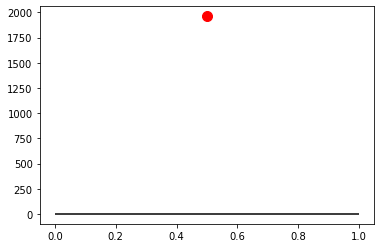

Maximum benefit at cutoff 0.5 with revenue delta of $1,960.99


In [10]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series): 
    # Plot the revenue deltas rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red') 
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)